In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('C:\Clean_Dataset.csv', header=0)

In [3]:
print(df.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
print(df.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [6]:
df = df.drop(columns = ["Unnamed: 0"])

In [7]:
print(df.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [8]:
summary = df.describe().transpose()

In [9]:
summary

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [10]:
summary = df.describe(include = ['object']).transpose()

In [11]:
summary

,count,unique,top,freq
airline,300153,6,Vistara,127859
flight,300153,1561,UK-706,3235
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


In [12]:
economy = df[df['class'] == 'Economy']
print(economy.describe().transpose())

              count         mean          std      min      25%      50%  \
duration   206666.0    11.550060     7.241284     0.83     6.25    10.17   
days_left  206666.0    26.123673    13.529610     1.00    15.00    26.00   
price      206666.0  6572.342383  3743.519517  1105.00  4173.00  5772.00   

               75%       max  
duration     15.25     49.83  
days_left    38.00     49.00  
price      7746.00  42349.00  


In [13]:
business = df[df['class'] == 'Business']
print(business.describe().transpose())

             count          mean           std      min       25%       50%  \
duration   93487.0     13.704274      6.852555      1.0      8.83     13.08   
days_left  93487.0     25.741857     13.626538      1.0     14.00     26.00   
price      93487.0  52540.081124  12969.314606  12000.0  45185.00  53164.00   

                75%        max  
duration      17.83      47.75  
days_left     38.00      49.00  
price      60396.00  123071.00  


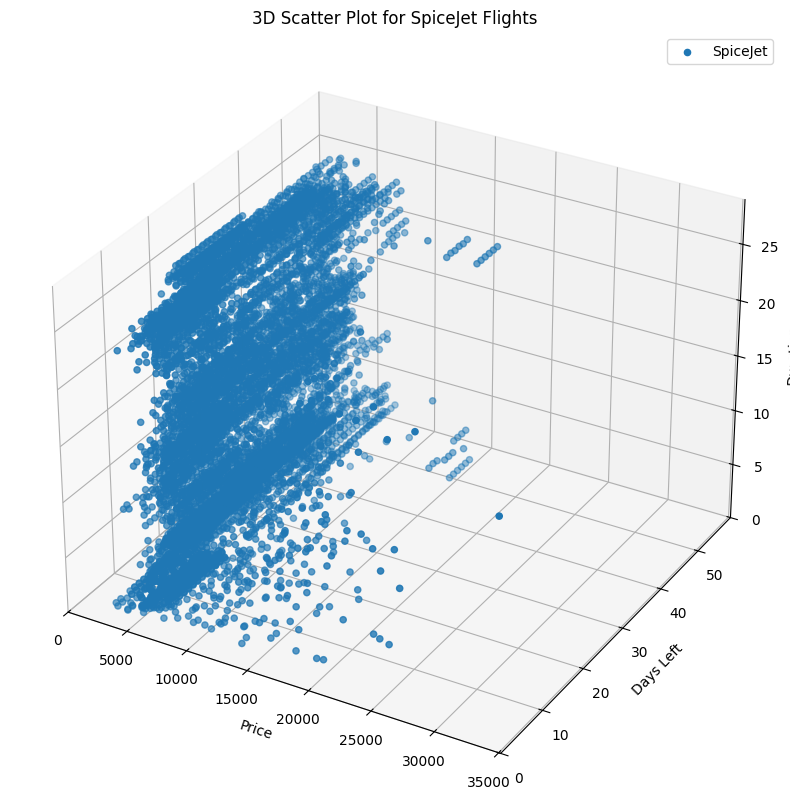

In [36]:
spicejet_flights = df[df['airline'] == 'SpiceJet']

price_max = spicejet_flights['price'].max() if not np.isnan(spicejet_flights['price']).all() else 1
days_left_max = spicejet_flights['days_left'].max() if not np.isnan(spicejet_flights['days_left']).all() else 1
duration_max = spicejet_flights['duration'].max() if not np.isnan(spicejet_flights['duration']).all() else 1

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(spicejet_flights['price'], spicejet_flights['days_left'], spicejet_flights['duration'], label='SpiceJet')

ax.set_xlabel('Price')
ax.set_ylabel('Days Left')
ax.set_zlabel('Duration')

ax.set_xlim([0, price_max + 1000])
ax.set_ylim([0, days_left_max + 10])
ax.set_zlim([0, duration_max + 1])

ax.set_title('3D Scatter Plot for SpiceJet Flights')

ax.legend()

plt.show()


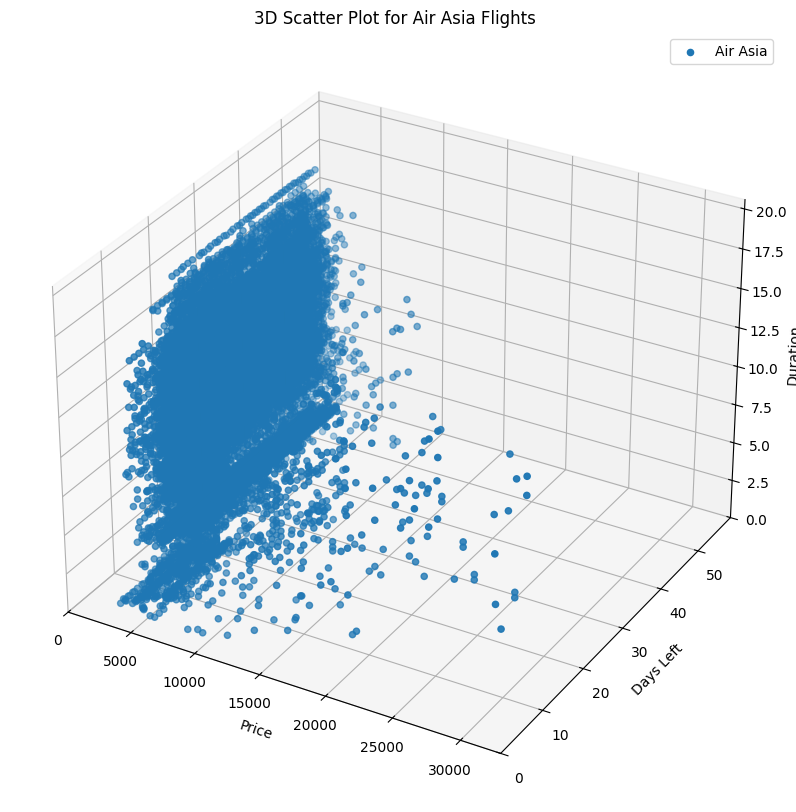

In [38]:
airasia_flights = df[df['airline'] == 'AirAsia']

price_max = airasia_flights['price'].max() if not np.isnan(airasia_flights['price']).all() else 1
days_left_max = airasia_flights['days_left'].max() if not np.isnan(airasia_flights['days_left']).all() else 1
duration_max = airasia_flights['duration'].max() if not np.isnan(airasia_flights['duration']).all() else 1

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(airasia_flights['price'], airasia_flights['days_left'], airasia_flights['duration'], label='Air Asia')

ax.set_xlabel('Price')
ax.set_ylabel('Days Left')
ax.set_zlabel('Duration')

ax.set_xlim([0, price_max + 1000])
ax.set_ylim([0, days_left_max + 10])
ax.set_zlim([0, duration_max + 1])

ax.set_title('3D Scatter Plot for Air Asia Flights')

ax.legend()

plt.show()

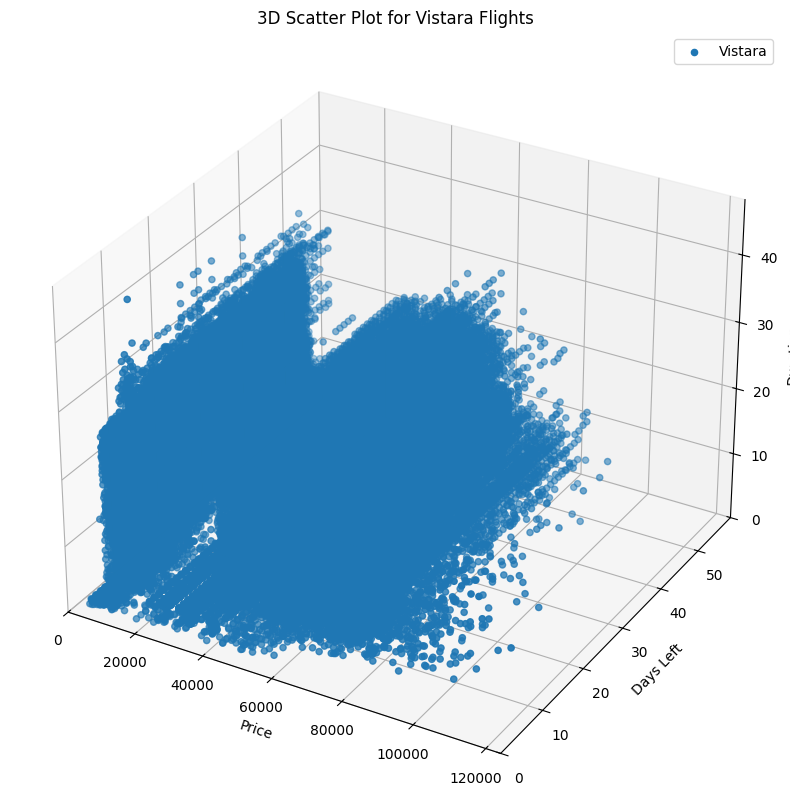

In [39]:
vistara_flights = df[df['airline'] == 'Vistara']

price_max = vistara_flights['price'].max() if not np.isnan(vistara_flights['price']).all() else 1
days_left_max = vistara_flights['days_left'].max() if not np.isnan(vistara_flights['days_left']).all() else 1
duration_max = vistara_flights['duration'].max() if not np.isnan(vistara_flights['duration']).all() else 1

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(vistara_flights['price'], vistara_flights['days_left'], vistara_flights['duration'], label='Vistara')

ax.set_xlabel('Price')
ax.set_ylabel('Days Left')
ax.set_zlabel('Duration')

ax.set_xlim([0, price_max + 1000])
ax.set_ylim([0, days_left_max + 10])
ax.set_zlim([0, duration_max + 1])

ax.set_title('3D Scatter Plot for Vistara Flights')

ax.legend()

plt.show()


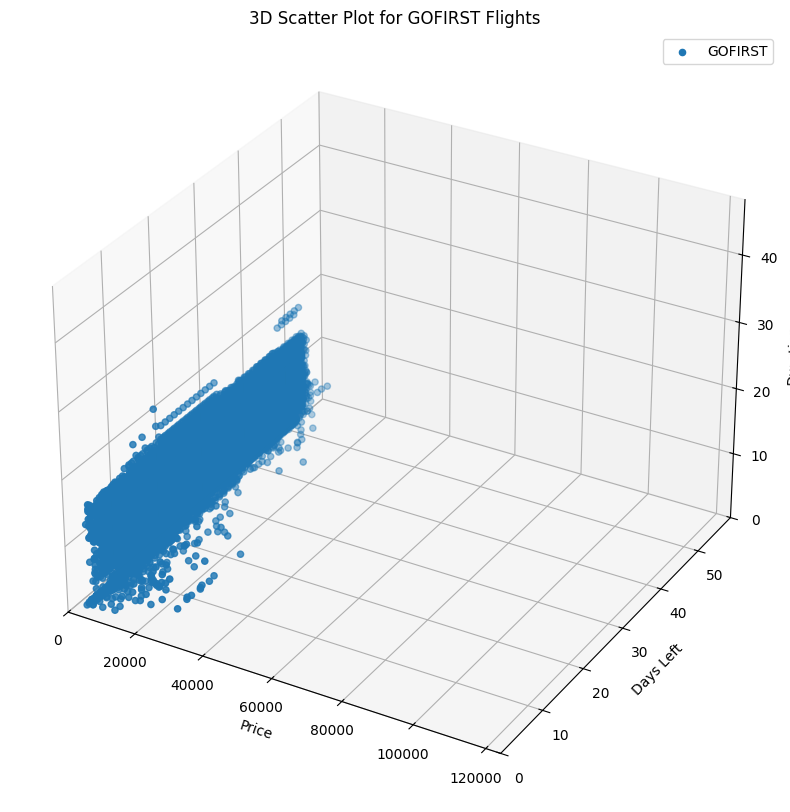

In [42]:
GOFIRST_flights = df[df['airline'] == 'GO_FIRST']

price_max = vistara_flights['price'].max() if not np.isnan(GOFIRST_flights['price']).all() else 1
days_left_max = vistara_flights['days_left'].max() if not np.isnan(GOFIRST_flights['days_left']).all() else 1
duration_max = vistara_flights['duration'].max() if not np.isnan(GOFIRST_flights['duration']).all() else 1

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(GOFIRST_flights['price'], GOFIRST_flights['days_left'], GOFIRST_flights['duration'], label='GOFIRST')

ax.set_xlabel('Price')
ax.set_ylabel('Days Left')
ax.set_zlabel('Duration')

ax.set_xlim([0, price_max + 1000])
ax.set_ylim([0, days_left_max + 10])
ax.set_zlim([0, duration_max + 1])

ax.set_title('3D Scatter Plot for GOFIRST Flights')

ax.legend()

plt.show()


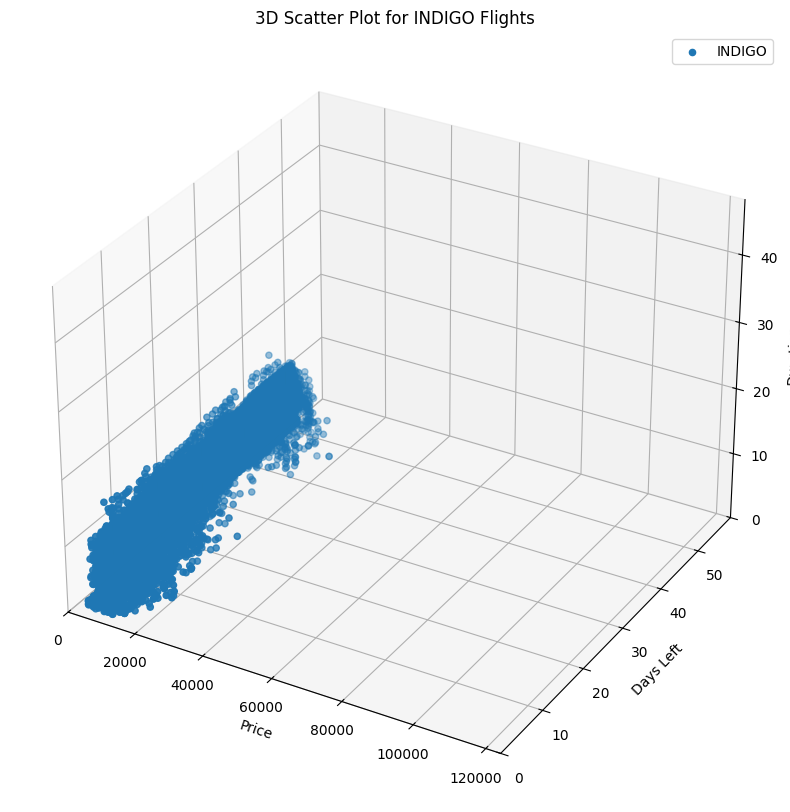

In [44]:
INDIGO_flights = df[df['airline'] == 'Indigo']

price_max = vistara_flights['price'].max() if not np.isnan(INDIGO_flights['price']).all() else 1
days_left_max = vistara_flights['days_left'].max() if not np.isnan(INDIGO_flights['days_left']).all() else 1
duration_max = vistara_flights['duration'].max() if not np.isnan(INDIGO_flights['duration']).all() else 1

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(INDIGO_flights['price'], INDIGO_flights['days_left'], INDIGO_flights['duration'], label='INDIGO')

ax.set_xlabel('Price')
ax.set_ylabel('Days Left')
ax.set_zlabel('Duration')

ax.set_xlim([0, price_max + 1000])
ax.set_ylim([0, days_left_max + 10])
ax.set_zlim([0, duration_max + 1])

ax.set_title('3D Scatter Plot for INDIGO Flights')

ax.legend()

plt.show()


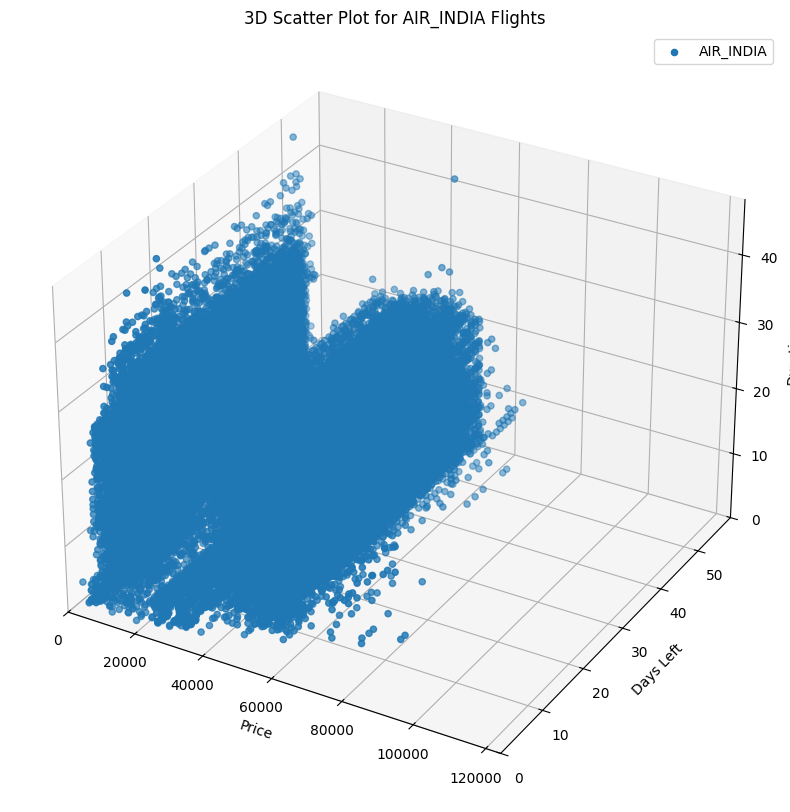

In [45]:
AIR_INDIA_flights = df[df['airline'] == 'Air_India']

price_max = vistara_flights['price'].max() if not np.isnan(AIR_INDIA_flights['price']).all() else 1
days_left_max = vistara_flights['days_left'].max() if not np.isnan(AIR_INDIA_flights['days_left']).all() else 1
duration_max = vistara_flights['duration'].max() if not np.isnan(INDIGO_flights['duration']).all() else 1

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(AIR_INDIA_flights['price'], AIR_INDIA_flights['days_left'], AIR_INDIA_flights['duration'], label='AIR_INDIA')

ax.set_xlabel('Price')
ax.set_ylabel('Days Left')
ax.set_zlabel('Duration')

ax.set_xlim([0, price_max + 1000])
ax.set_ylim([0, days_left_max + 10])
ax.set_zlim([0, duration_max + 1])

ax.set_title('3D Scatter Plot for AIR_INDIA Flights')

ax.legend()

plt.show()
